In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from quickdraw import QuickDrawDataGroup

from bwb.distributions import DistributionDraw

Empezamos por obtener una imagen con la que instanciar la clase

In [2]:
# Definir el nombre del data set
DATASET_NAME = "face"

# Instanciar la clase
qd_data_group = QuickDrawDataGroup(DATASET_NAME, max_drawings=None)
print(f"{qd_data_group.drawing_count = }")

draw1 = qd_data_group.get_drawing(0)  # Obtener el primer dibujo
image1 = draw1.get_image()  # Obtener su imagen Pillow a través del método get_image

loading face drawings
load complete
qd_data_group.drawing_count = 161666


Instanciamos la clase y comprobamos que la matriz construida sea una distribución de probabilidad

In [3]:
dd = DistributionDraw(image1, seed=42)
assert dd.matrix.sum() == 1.0, "La matriz no suma 1.0"

Mostramos la imagen de la carita.

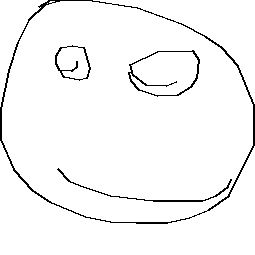

In [4]:
dd.image


Generamos sampleos a partir de la distribución de la carita

In [5]:
data = np.array(dd.rvs(10000))

Ploteamos el histograma generado por el sampleo de los datos de la carita

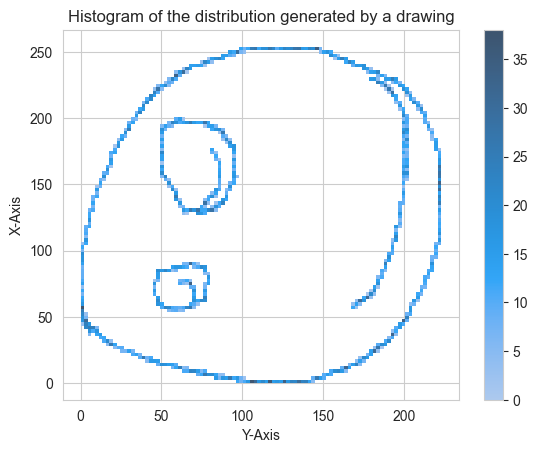

In [6]:
df = pd.DataFrame(data)
sns.histplot(data=df, x=0, y=1, bins=100, cbar=True)
plt.xlabel("Y-Axis")
plt.ylabel("X-Axis")
plt.title("Histogram of the distribution generated by a drawing")
plt.show()

Notamos que la distribución del histograma es la esperada. La imagen se encuentra rotada porque en la imagen original la matriz se empieza a generar a partir de la esquina superior izquierda, mientras que en la imagen la matriz se genera a partir de la esquina inferior izquierda.

In [7]:
dd.pdf(0, 29)

0.0

Intentemos ver como se construye una carita a partir de un arreglo. Empecemos importando el dataset original de caras como si fuera de arreglo.

In [8]:
arr = np.load(r"..\data\face.npy")
arr

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

Luego inicializaremos una instancia utilizando el inicializador alternativo

In [9]:
data = 255 - arr[0, :].reshape(28, 28)
dd_arr = DistributionDraw.fromarray(data, seed=42)

In [14]:
dd_arr.matrix

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000

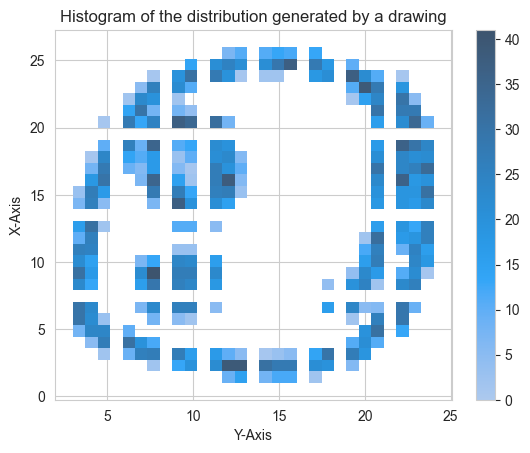

In [22]:
data = dd_arr.rvs(5000)
df = pd.DataFrame(data)
sns.histplot(data=df, x=0, y=1, bins=29, cbar=True)
plt.xlabel("Y-Axis")
plt.ylabel("X-Axis")
plt.title("Histogram of the distribution generated by a drawing")
plt.show()